# Image Classification with MLPs





In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1] range
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for a fully connected network
X_train_full = X_train_full.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode labels
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

# Split into train (80%), dev (10%), test (10%)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [8]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model and store history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_dev, y_dev))

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8624 - loss: 0.4735 - val_accuracy: 0.9532 - val_loss: 0.1564
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9628 - loss: 0.1230 - val_accuracy: 0.9697 - val_loss: 0.0994
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9766 - loss: 0.0764 - val_accuracy: 0.9713 - val_loss: 0.1022
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9818 - loss: 0.0570 - val_accuracy: 0.9727 - val_loss: 0.0928
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9754 - val_loss: 0.0844
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9887 - loss: 0.0332 - val_accuracy: 0.9744 - val_loss: 0.0892
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9768 - val_loss: 0.0861
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9923 - loss: 0.0234 -

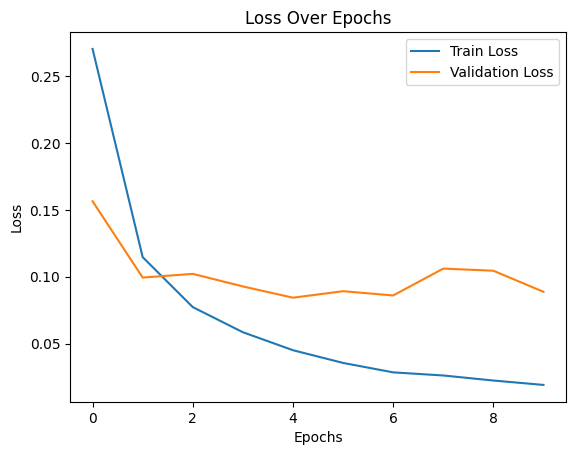

In [9]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


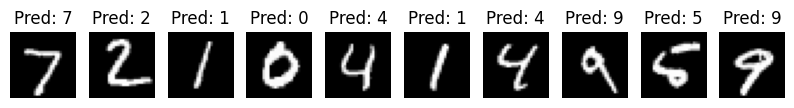

In [14]:
# Display some test images with predicted labels
num_samples = 10
test_samples = X_test[:num_samples].reshape(-1, 28, 28)
predictions = np.argmax(model.predict(X_test[:num_samples]), axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_samples[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')

plt.show()

# Regression with MLPs

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)  # Ensure y is a 2D array

# Scale features using Min-Max Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into train (80%), dev (10%), test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
# Define neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model and store history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_dev, y_dev))

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0499 - mae: 0.1618 - val_loss: 0.0235 - val_mae: 0.1123
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0230 - mae: 0.1098 - val_loss: 0.0219 - val_mae: 0.1087
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0189 - mae: 0.0995 - val_loss: 0.0201 - val_mae: 0.1009
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0190 - mae: 0.0989 - val_loss: 0.0199 - val_mae: 0.0935
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0177 - mae: 0.0943 - val_loss: 0.0189 - val_mae: 0.0930
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0185 - mae: 0.0959 - val_loss: 0.0187 - val_mae: 0.0954
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0179 - mae: 0.0941 - val_loss: 0.0187 - val_mae: 0.0915
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0175 - mae: 0.0923 - val_loss: 0.0181 - val_mae: 0.0911
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

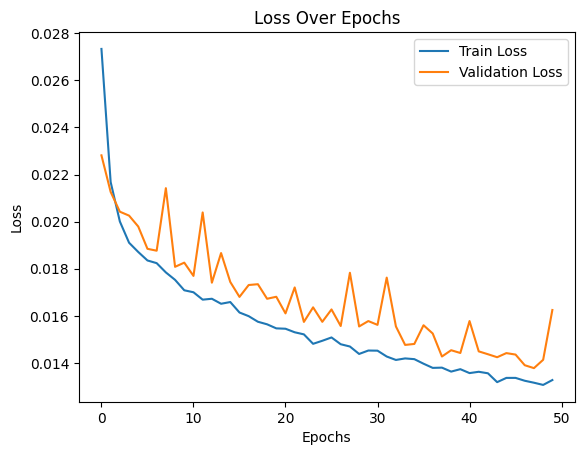

In [19]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


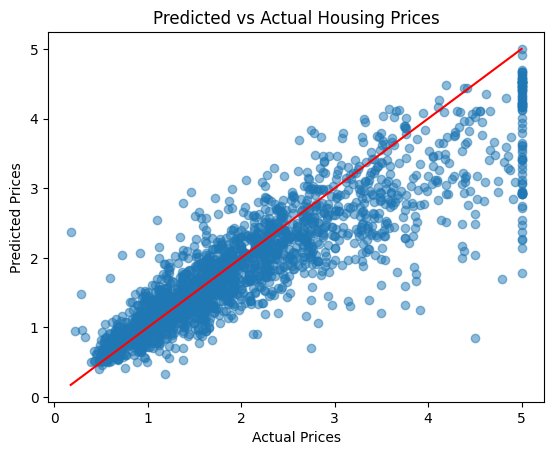

In [ ]:
# Predict on test set and plot against actual values
y_pred = model.predict(X_test)

# Rescale back to original range
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# Scatter plot of predictions vs actual values
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Housing Prices')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red')  # Ideal line
plt.show()